In [15]:
import os
import numpy as np
from PIL import Image

from src.controller.ml_controller import MLController

################## PATH ##################
LFW_DATASET_PATH = r"..\data\dataset-lfw_reconstructed"
DB_PATH = r"..\data\gui_database.db"
ML_OUTPUT = r"..\data\ml_models"

# Import Data

### Noised DB dataset

In [16]:
mlc = MLController(db_path=DB_PATH, ml_output=ML_OUTPUT)
print(mlc.X.shape)

(511, 100, 100, 3)


### Noised LFW dataset

In [17]:
from src.modules.data_loader import load_anonymized_images_flat
os.makedirs(LFW_DATASET_PATH, exist_ok=True)


X, y, label_encoder = load_anonymized_images_flat(
    data_dir=LFW_DATASET_PATH,
    img_width=100,
    img_height=100,
    color_mode='grayscale'
)

if not X.shape and not y.shape and not label_encoder:
    raise ValueError('Critical error while loading data. Script stopped..')
print(f"\n(nb_image, width, height, channels) : {X.shape}")

mlc = MLController(db_path=DB_PATH, ml_output=ML_OUTPUT, data=(X, y, label_encoder))

Chargement des images depuis : ..\data\dataset-lfw_reconstructed
Format attendu : 100x100, mode: grayscale
Trouvé 1240 fichiers PNG.
Chargement terminé. 1240 images traitées, 0 fichiers ignorés.
Shape final des données (X): (1240, 100, 100, 1)
1240 labels originaux encodés en 62 classes numériques.

(nb_image, width, height, channels) : (1240, 100, 100, 1)


# Train

In [18]:
mlc.prepare_data()
print(mlc.X_train.shape)

Division des données : test_size=0.2, validation_size=0.15
Taille Test: 248 échantillons
Taille Entraînement: 806 échantillons
Taille Validation: 186 échantillons
(806, 100, 100, 1)


In [19]:
mlc.create_model()

Construction du modèle CNN simple avec input_shape=(100, 100, 1) et num_classes=62
Modèle CNN simple construit.


Model: "simple_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_1 (Conv2D)                │ (None, 100, 100, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_1 (BatchNormalization)      │ (None, 100, 100, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 100, 100, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_2 (BatchNormalization)      │ (None, 100, 100, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2_1 (BatchNormalization)      │ (None, 50, 50, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2_2 (BatchNormalization)      │ (None, 50, 50, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │     5,120,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_dense1 (BatchNormalization)  │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense1 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_softmax (Dense)          │ (None, 62)             │         7,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,194,398 (19.82 MB)

 Trainable params: 5,193,758 (19.81 MB)

 Non-trainable params: 640 (2.50 KB)


Epoch 1: val_accuracy improved from -inf to 0.01613, saving model to ..\data\ml_models/trained\simple_cnn_lfw_anony_v1.h5



Epoch 2: val_accuracy did not improve from 0.01613

Epoch 3: val_accuracy did not improve from 0.01613

Epoch 4: val_accuracy did not improve from 0.01613

Epoch 5: val_accuracy did not improve from 0.01613

Epoch 6: val_accuracy did not improve from 0.01613

Epoch 7: val_accuracy did not improve from 0.01613

Epoch 8: val_accuracy did not improve from 0.01613

Epoch 9: val_accuracy did not improve from 0.01613

Epoch 10: val_accuracy did not improve from 0.01613

Epoch 11: val_accuracy improved from 0.01613 to 0.02688, saving model to ..\data\ml_models/trained\simple_cnn_lfw_anony_v1.h5



Epoch 12: val_accuracy improved from 0.02688 to 0.05914, saving model to ..\data\ml_models/trained\simple_cnn_lfw_anony_v1.h5



Epoch 13: val_accuracy improved from 0.05914 to 0.08602, saving model to ..\data\ml_models/trained\simple_cnn_lfw_anony_v1.h5



Epoch 14: val_accuracy improved from 0.08602 to 0.13978, saving model to ..\data\ml_models/trained\simple_cnn_lfw_anony_v1.h5



Epoch 15: val_accuracy did not improve from 0.13978

Epoch 16: val_accuracy improved from 0.13978 to 0.26882, saving model to ..\data\ml_models/trained\simple_cnn_lfw_anony_v1.h5



Epoch 17: val_accuracy improved from 0.26882 to 0.38710, saving model to ..\data\ml_models/trained\simple_cnn_lfw_anony_v1.h5



Epoch 18: val_accuracy improved from 0.38710 to 0.60215, saving model to ..\data\ml_models/trained\simple_cnn_lfw_anony_v1.h5



Epoch 19: val_accuracy improved from 0.60215 to 0.83871, saving model to ..\data\ml_models/trained\simple_cnn_lfw_anony_v1.h5



Epoch 20: val_accuracy improved from 0.83871 to 0.91935, saving model to ..\data\ml_models/trained\simple_cnn_lfw_anony_v1.h5



Epoch 21: val_accuracy improved from 0.91935 to 0.95161, saving model to ..\data\ml_models/trained\simple_cnn_lfw_anony_v1.h5



Epoch 22: val_accuracy improved from 0.95161 to 0.97312, saving model to ..\data\ml_models/trained\simple_cnn_lfw_anony_v1.h5



Epoch 23: val_accuracy improved from 0.97312 to 0.97849, saving model to ..\data\ml_models/trained\simple_cnn_lfw_anony_v1.h5



Epoch 24: val_accuracy did not improve from 0.97849

Epoch 25: val_accuracy did not improve from 0.97849

Epoch 26: val_accuracy improved from 0.97849 to 0.98387, saving model to ..\data\ml_models/trained\simple_cnn_lfw_anony_v1.h5



Epoch 27: val_accuracy did not improve from 0.98387

Epoch 28: val_accuracy did not improve from 0.98387

Epoch 29: val_accuracy did not improve from 0.98387

Epoch 30: val_accuracy did not improve from 0.98387

Epoch 31: val_accuracy did not improve from 0.98387

Epoch 32: val_accuracy did not improve from 0.98387

Epoch 33: val_accuracy did not improve from 0.98387

Epoch 34: val_accuracy improved from 0.98387 to 0.98925, saving model to ..\data\ml_models/trained\simple_cnn_lfw_anony_v1.h5



Epoch 35: val_accuracy did not improve from 0.98925

Epoch 36: val_accuracy did not improve from 0.98925

Epoch 37: val_accuracy did not improve from 0.98925

Epoch 38: val_accuracy did not improve from 0.98925

Epoch 39: val_accuracy did not improve from 0.98925

Epoch 40: val_accuracy did not improve from 0.98925

Epoch 41: val_accuracy did not improve from 0.98925

Epoch 42: val_accuracy did not improve from 0.98925

Epoch 43: val_accuracy did not improve from 0.98925

Epoch 44: val_accuracy did not improve from 0.98925
Epoch 44: early stopping
Restoring model weights from the end of the best epoch: 34.
LabelEncoder sauvegardé dans : ..\data\ml_models/trained\simple_cnn_lfw_anony_v1_label_encoder.joblib
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9825 - loss: 0.2112
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/stepWARNING:tensorflow:5 out of the last 17 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F5167228E0> triggered tf.f

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
--- Training Script Completed in 259.17 secondes ---

curves : <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1200x500 at 0x1F50F608CB0>

confusion_matrix : [[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]

classification_report : /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCANHAREDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8

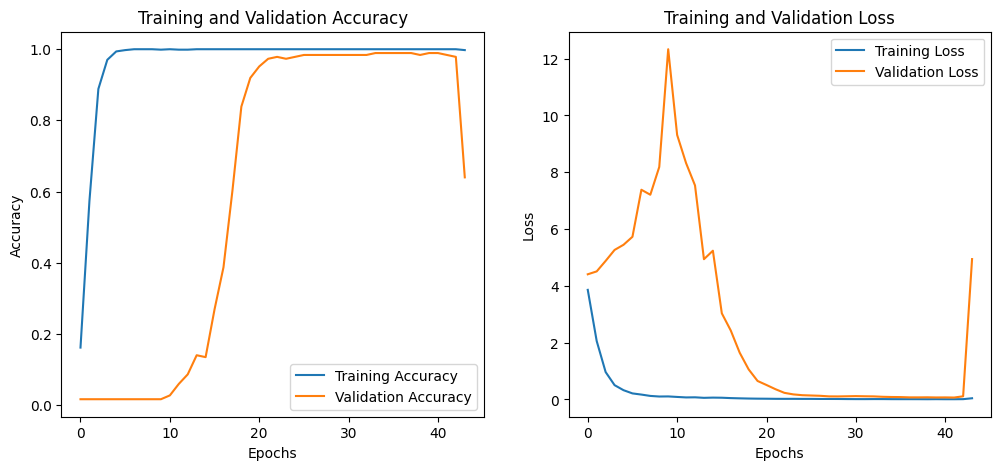

In [20]:
result_train = mlc.train_model()
print(f"--- Training Script Completed in {mlc.duration:.2f} secondes ---")
for key, val in result_train.items(): print(f"\n{key} : {val}")

# Predict noised image (l'image source ne doit pas etre noised normalement)

In [22]:
user = 42
image_path = f"../data/dataset-lfw_reconstructed/reconstructed_{user}_2.png"
image = np.array(Image.open(image_path))

mlc = MLController(db_path=DB_PATH, ml_output=ML_OUTPUT)
result = mlc.predict_image(image)
predicted_label, prediction_confidence = result
print(f"  - Predicted Identity (Subject ID) : {predicted_label}")
print(f"  - Trust : {prediction_confidence:.4f} ({prediction_confidence*100:.2f}%)")

LabelEncoder chargé depuis : ..\data\ml_models/trained\simple_cnn_lfw_anony_v1_label_encoder.joblib
Preprocessed image, final shape: (1, 100, 100, 1, 1)


D:\myDocs\Apprentissage\Isep\Year_3\Brno-Privacy_Preserving_Face_Recognition_Project\venv\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_image']
Received: inputs=Tensor(shape=(1, 100, 100, 1, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
  - Predicted Identity (Subject ID) : 42
  - Trust : 0.9944 (99.44%)
